In [2]:
# create random network with x total nodes, 2 entry nodes and 2 exit nodes and display it

import networkx as nx
import matplotlib.pyplot as plt
import random
import json
import subprocess
import itertools
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

# Create New Attack Ladder

In [3]:
### ---------------------------------------------------------------------------------------
### Generates attack ladder based on a directed graph structured by rungs nodes and edges
### randomly generates based on specified number of rungs, the max nodes (maxN) and the max edges (maxE)
### maxN and maxE are the maximum number of nodes and edges that can be connected to the prior rung
### ---------------------------------------------------------------------------------------
def a_ladder_graph(rungs=5, maxN=2, maxE=2):
    #initialize directed graph
    G = nx.DiGraph()
    
    #for each rung, add random number of nodes between 1 and maxN and connect them to prior rung
    priorRung = []
    nodeCount = 1
    for i in range(rungs):
        n_ran = random.randint(1,maxN)
        currentRung = []
        for j in range(n_ran):
            G.add_node(nodeCount)
            currentRung.append(nodeCount)
            nodeCount += 1
            if len(priorRung) > 0:                
                for k in priorRung:
                    e_ran = random.randint(0,maxE)
                    for e in range(e_ran):
                        chosenDest = random.choice(currentRung)
                        if not G.has_edge(k,chosenDest):
                            G.add_edge(k,chosenDest)                                                            
                            
        priorRung = currentRung.copy()

    return G

### ---------------------------------------------------------------------------------------
### Generates the table structure for the attack ladder
### recursively dives through the dictionary of dictionaries to get to the bottom
### sets the values for the bottom nodes based on random value rounded to 2 decimal
### ---------------------------------------------------------------------------------------
def create_table(depth, keys, values):
    if depth == len(keys) - 1:
        randomVal = round(random.random(), 2)        
        return {f'{keys[-1]}yes': randomVal, f'{keys[-1]}no': round((1 - randomVal), 2)}
    else:
        key = keys[depth]
        return {key + 'yes': create_table(depth + 1, keys, values),
                key + 'no': create_table(depth + 1, keys, values)}

### ---------------------------------------------------------------------------------------
### Test function to try out defined values with create_table function
### ---------------------------------------------------------------------------------------
def runTableTest():
    # Example usage with four sets of values
    ids  = ['1', '2']
    values_list = []
    #dimensions = 2**len(ids)
    dimensions = len(ids)

    for d in range(dimensions):
        randomVal = round(random.random(), 2)
        values_list.append(randomVal)
        values_list.append(round((1 - randomVal), 2))

    print("Dimensions = ", dimensions)
    print("Values = ", values_list)
    json_object = {"tbl": create_table(0, ids, values_list)}
    print(json_object)

### ---------------------------------------------------------------------------------------
### function to interact with create table and return the complete json structure for attack ladders
### ---------------------------------------------------------------------------------------
def runTable(selfid, ids):
    values_list = []
    dimensions = 2**len(ids)    
        
    # create a list of random values of count dimensions
    for d in range(dimensions):
        randomVal = round(random.random(), 2)
        values_list.append(randomVal)
        values_list.append(round((1 - randomVal), 2))

    ids.sort()
    ids.append(selfid)
        
    json_object = {"tbl": create_table(0, ids, values_list)}
    
    return json_object

### ---------------------------------------------------------------------------------------
### function to create and write json file from networkx graph
### ---------------------------------------------------------------------------------------
def createJson(jsonFile, G):
    nodes = []
    for i in G.nodes:
        nodes.append(G.nodes[i])
    # convert G.edges into an array
    edges = []
    for i in G.edges:
        edges.append({"source": G.nodes[i[0]], "target": G.nodes[i[1]]})

    # create a dictionary of nodes and edges
    data = {"nodes": nodes, "edges": edges}

    # create a json file of the dictionary
    with open(jsonFile, 'w') as outfile:
        json.dump(data, outfile)

def writeJson(jsonFile, data):
    with open(jsonFile, 'w') as outfile:
        json.dump(data, outfile)

### READ in data.json and save as a graph and dictionary of json file
# read in data.json
def readJson(attackLadderFile):
    with open(attackLadderFile) as json_file:
        data = json.load(json_file)
        #print(data)
        #print(data['nodes'])

        # create a graph
        G = nx.DiGraph()
        # add nodes
        for n in data['nodes']:
            G.add_node(n['id'])
            G.nodes[n['id']]['title'] = n['title']
            G.nodes[n['id']]['functionalities'] = n['functionalities']
            G.nodes[n['id']]['vulnerabilities'] = n['vulnerabilities']
            G.nodes[n['id']]['x'] = n['x']
            G.nodes[n['id']]['y'] = n['y']
            G.nodes[n['id']]['values'] = n['values']
            G.nodes[n['id']]['tbl'] = n['tbl']
            #G.nodes[n['id']]['sampled'] = n['sampled']
            G.nodes[n['id']]['id'] = n['id']
            G.nodes[n['id']]['orderId'] = n['orderId']

        # add edges
        for e in data['edges']:
            G.add_edge(e['source']['id'], e['target']['id'])

        # display randGraph
        print(G.nodes)
        print(G.edges)
    return data, G


In [3]:
runTableTest()

Dimensions =  2
Values =  [0.13, 0.87, 0.36, 0.64]
{'tbl': {'1yes': {'2yes': 0.66, '2no': 0.34}, '1no': {'2yes': 0.89, '2no': 0.11}}}


# Create Random Network based on Ladder Graph Structure

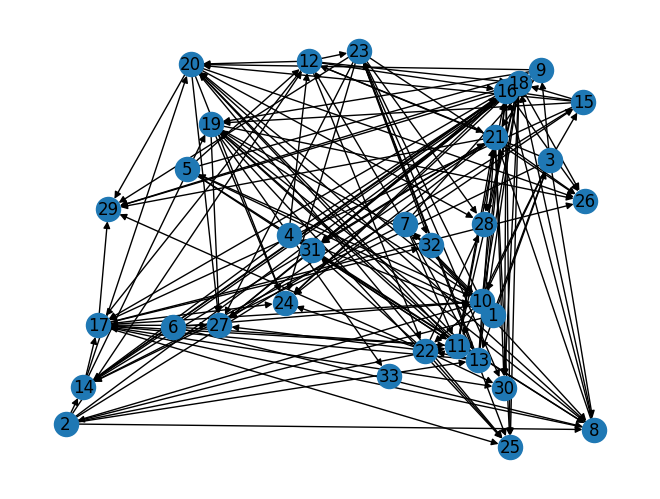

In [4]:
# Create a random directional graph with 10 nodes and 20 edges
#G = nx.gnm_random_graph(5, 8, directed=True)
G = a_ladder_graph(rungs=5, maxN=10, maxE=5)#nx.ladder_graph(5)

# Create positions for the nodes in a tree layout
pos = nx.random_layout(G)

# draw the graph with labels
nx.draw(G, pos, with_labels=True)
plt.show()


In [5]:

print(G.nodes)
print(G.edges)
print(G.number_of_nodes())
print(G.number_of_edges())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (2, 8), (2, 9), (2, 10), (2, 12), (2, 11), (2, 13), (2, 15), (2, 14), (3, 9), (3, 8), (3, 10), (3, 12), (3, 11), (3, 13), (3, 14), (3, 15), (4, 8), (4, 9), (4, 11), (4, 12), (4, 14), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 8), (6, 10), (6, 9), (6, 14), (6, 11), (7, 8), (7, 9), (7, 10), (7, 12), (7, 14), (7, 13), (7, 15), (7, 11), (8, 16), (8, 17), (8, 19), (8, 18), (8, 21), (8, 20), (9, 17), (9, 16), (9, 19), (9, 20), (9, 21), (9, 18), (10, 16), (10, 17), (10, 18), (10, 19), (10, 22), (10, 20), (10, 23), (11, 17), (11, 16), (11, 18), (11, 21), (11, 20), (11, 19), (12, 17), (12, 16), (12, 20), (12, 18), (12, 21), (12, 22), (12, 23), (13, 16), (13, 18), (13, 17), (13, 19), (13, 20), (13, 21), (13, 22), (13, 23), (14, 16), (14, 17), (14, 18), (14, 19), (14, 21), (14, 20), (15, 16), (15, 17), (15, 18), (15, 19), (15, 20)

In [6]:
# for each node in G assign a string title
for i in G.nodes:
    G.nodes[i]['title'] = 'node ' + str(i)
    G.nodes[i]['functionalities'] = []
    G.nodes[i]['vulnerabilities'] = []    

    G.nodes[i]['x'] = round(float(pos[i][0]), 2)
    G.nodes[i]['y'] = round(float(pos[i][1]), 2)
    G.nodes[i]['values'] = ["yes", "no"]
    
    ids = []
    for e in G.in_edges(i):
        ids.append(str(e[0]))

    G.nodes[i]['tbl'] = runTable(str(i), ids)['tbl']


    G.nodes[i]['sampled'] = "false"
    G.nodes[i]['id'] = i
    G.nodes[i]['orderId'] = i
    



# Modify existing attack ladder
 Use create network to (recreate the network that is passed in) adjusting some of the probabilities

In [47]:
data = {}
aLFile = 'attack_ladder.json'

### Get data dictionary of json and G network graph
data, G = readJson(aLFile)

[12, 13, 14, 15, 16, 17]
[(12, 13), (12, 17), (13, 14), (13, 17), (14, 15), (14, 17), (15, 16), (15, 17), (16, 17)]


In [48]:
idToUpdate = '12yes'

In [49]:
### Recursive function to go to the end of the tbl datastructure used by attack ladder
### This can be used to traverse the dictionary of dictionaries to get to the final key value pairs in order to update them

def deepdiveDict(d, depth=0, focusedKey={}):    
    for k in d.copy():
        if isinstance(d[k], dict):
            if 'yes' in k:
                deepdiveDict(d[k], depth+1, focusedKey)
        else:
            if len(focusedKey.keys()) == 0:
                if focusedKey[k] == 0:
                    d[k] = round(random.random(), 2)                                        
                id_val = 0
                if 'yes' in k:
                    id_val = int(k.split('yes')[0])
                    updateKey = str(id_val)+'no'
                    d[updateKey] = round((1 - d[k]), 2)
                else:
                    id_val = int(k.split('no')[0])
                    updateKey = str(id_val)+'yes'
                    d[updateKey] = round((1 - d[k]), 2)            
            else:
                if k in focusedKey.keys():                                                            
                    if focusedKey[k] == -1:
                        d[k] = round(random.random(), 2)                    
                    else:
                        d[k] = focusedKey[k]
                    if 'yes' in k:
                        id_val = int(k.split('yes')[0])                         
                        updateKey = str(id_val)+'no'
                        d[updateKey] = round((1 - d[k]), 2)
                    else:
                        id_val = int(k.split('no')[0])                        
                        updateKey = str(id_val)+'yes'
                        d[updateKey] = round((1 - d[k]), 2)

In [55]:
focusedKey = {}
focusedKey[idToUpdate] = 0.12
focusedKey['13yes'] = 0.12
focusedKey['14yes'] = 0.12
for n in range(len(data['nodes'])):
    deepdiveDict(data['nodes'][n]['tbl'], focusedKey=focusedKey)

#print(len(data['nodes'][0]['tbl']))
#deepdiveDict(data['nodes'][0]['tbl'], focusedKey=focusedKey)

In [58]:
data['nodes'][3]

{'id': 15,
 'orderId': 15,
 'title': 'Escalate Privileges',
 'functionalities': [],
 'vulnerabilities': [],
 'x': 794.319423051649,
 'y': 404.2256758156792,
 'values': ['yes', 'no'],
 'tbl': {'14yes': {'15yes': 0.66, '15no': 0.34},
  '14no': {'15yes': 0, '15no': 1}},
 'sampled': False,
 'index': 3,
 'weight': 3,
 'px': 794.3305193498488,
 'py': 404.2684115346868}

In [39]:
#createJson('testout.json', G)
writeJson('testout.json', data)

# Utilize headless to sample results

In [59]:
### Read ../headless_js/fixed.json and save as a dictionary of 2 keys yes and no each containing a value that is an array of strings

with open('../../headless_js/fixed.json') as json_file:
    fixed = json.load(json_file)
    print(fixed)
    # capture the max and min string id for all the arrays
    max = 0
    min = 100

for k in fixed:
    for s in fixed[k]:
        if int(s) > max:
            max = int(s)
        if int(s) < min:
            min = int(s)
print(max)
print(min)

{'yes': ['1', '4'], 'no': ['2', '6']}
6
1


### Read in Full Attack Ladder With Vuls and Funcs network and produce set of tests

In [60]:
al_json = '../../files/nets/FullAttackLadderWithVulsAndFuncs.json'
dataDict, Graph = readJson(al_json)

### Get a list of node ids from Graph
nodeIds = []
for n in Graph.nodes:
    nodeIds.append(int(n))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[(1, 6), (2, 6), (3, 7), (4, 8), (5, 9), (6, 10), (7, 10), (8, 11), (9, 11), (9, 14), (10, 12), (10, 13), (11, 12)]


### Calculate random of fixed and not fixed

In [61]:
print(nodeIds)

min = nodeIds[0]
max = nodeIds[-1]

count = 0
samples = {}
combs = []

### Randomly assign integers between 0 and 2 for each nodeId
### 0 means unfixed, 1 means fixed yes, 2 means fixed no
while len(samples) < 120:
    combs = []
    for n in nodeIds:
        combs.append(random.randint(0, 2))
    ### check if combs is already in samples
    if combs not in samples.values():
        samples[count] = combs
        count += 1
    
print(len(samples))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
120


In [68]:
### Create an sqlite database and table to store each sample and its result
import sqlite3

conn = sqlite3.connect('samples.db')
c = conn.cursor()

### If samples.db does not exists then create it
c.execute('''CREATE TABLE IF NOT EXISTS samples
             (id INTEGER PRIMARY KEY, input TEXT, result TEXT)''')


### Create an empty dataframe with columns for id, input, and result
samples_df = pd.DataFrame(columns=['id', 'input', 'result'])

### Close database
conn.commit()
conn.close()

In [69]:
conn = sqlite3.connect('samples.db')
c = conn.cursor()

id = []
inputs = []
results = []
for i in samples:
    
    ### Process the inputs
    fixedJson = {'yes': [], 'no': []}
    for j in range(len(samples[i])):
        if samples[i][j] == 1:
            fixedJson['yes'].append(str(j))
        elif samples[i][j] == 2:
            fixedJson['no'].append(str(j))

    with open(f'./fixed.json', 'w') as outfile:
        json.dump(fixedJson, outfile)
    
    ### Run the program
    subprocess.run(['node', '../../headless_js/headless_sampler.js', '../../files/nets/attack_ladder.json', '100', f'./fixed.json', 'NA', f'./samples.json', f'summary.json'])

    ### Process the output
    with open(f'./summary.json') as json_file:
        summary = json.load(json_file)        
        #print(summary['17'])    

    inputs.append(str(samples[i]))
    results.append(str(summary['17']))
    id.append(i)

    ### Save the results to the database
    c.execute("INSERT INTO samples VALUES (?, ?, ?)", (i, str(samples[i]), str(summary['17'])))

### Close database
conn.commit()
conn.close()



In [70]:
### Query database table samples and save to dataframe
conn = sqlite3.connect('samples.db')
c = conn.cursor()
c.execute("SELECT * FROM samples")
rows = c.fetchall()
conn.close()

samples_df = pd.DataFrame(rows, columns=['id', 'input', 'result'])



In [71]:
### export samples_df['input'] to integer array or arrays
inputs = []

for i in samples_df['input']:
    inputs.append(list(map(int, i[1:-1].split(','))))

print(inputs[0])
                  

[1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1]


In [72]:
### Get summary statistics of samples_df
print(samples_df['input'].describe())

count                                            120
unique                                           120
top       [1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1]
freq                                               1
Name: input, dtype: object


In [73]:
###sort samples_df by result
samples_df.sort_values(by='result', ascending=False, inplace=True)

### Get the top 10 samples
print(samples_df.head(10))

    id                                       input result
26  26  [2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0]      8
49  49  [1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0]     37
53  53  [0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1]     36
70  70  [2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1]     36
46  46  [2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1]     35
74  74  [2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1]     35
4    4  [1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0]     34
21  21  [0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1]     34
14  14  [2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1]     34
41  41  [0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]     33


In [74]:
t = samples_df.head(1)['input'].to_string(index=False).split(',')
print(t, len(t))

### create new dataframe of samples_df where there are len(t)+1 columns where each column is the values from samples_df['input'] split by comma and the last column is samples_df['result']
df = pd.DataFrame(columns=[str(i) for i in range(len(t))])
result = []

for i in range(len(samples_df)):
    t = samples_df.iloc[i]['input'].split(',')
    print(t)
    ### remove [ from first element
    t[0] = t[0][1:]
    ### remove ] from last element
    t[-1] = t[-1][:-1]

    #t.append(samples_df.iloc[i]['result'])    
    print(t)
    result.append(float(samples_df.iloc[i]['result']))
    #if samples_df.iloc[i]['result'] > 30:
    #    result.append(True)
    #else:
    #    result.append(False)
    df.loc[i] = t
    

print(df.head(10))

['[2', ' 2', ' 2', ' 2', ' 0', ' 1', ' 2', ' 2', ' 1', ' 2', ' 2', ' 0', ' 0', ' 0]'] 14
['[2', ' 2', ' 2', ' 2', ' 0', ' 1', ' 2', ' 2', ' 1', ' 2', ' 2', ' 0', ' 0', ' 0]']
['2', ' 2', ' 2', ' 2', ' 0', ' 1', ' 2', ' 2', ' 1', ' 2', ' 2', ' 0', ' 0', ' 0']
['[1', ' 1', ' 2', ' 1', ' 0', ' 0', ' 0', ' 0', ' 1', ' 1', ' 0', ' 2', ' 1', ' 0]']
['1', ' 1', ' 2', ' 1', ' 0', ' 0', ' 0', ' 0', ' 1', ' 1', ' 0', ' 2', ' 1', ' 0']
['[0', ' 2', ' 0', ' 0', ' 1', ' 0', ' 1', ' 1', ' 2', ' 0', ' 2', ' 1', ' 1', ' 1]']
['0', ' 2', ' 0', ' 0', ' 1', ' 0', ' 1', ' 1', ' 2', ' 0', ' 2', ' 1', ' 1', ' 1']
['[2', ' 1', ' 1', ' 2', ' 1', ' 2', ' 2', ' 2', ' 2', ' 0', ' 0', ' 2', ' 1', ' 1]']
['2', ' 1', ' 1', ' 2', ' 1', ' 2', ' 2', ' 2', ' 2', ' 0', ' 0', ' 2', ' 1', ' 1']
['[2', ' 1', ' 1', ' 2', ' 1', ' 0', ' 2', ' 1', ' 1', ' 0', ' 2', ' 0', ' 1', ' 1]']
['2', ' 1', ' 1', ' 2', ' 1', ' 0', ' 2', ' 1', ' 1', ' 0', ' 2', ' 0', ' 1', ' 1']
['[2', ' 1', ' 1', ' 2', ' 0', ' 0', ' 2', ' 0', ' 0', ' 0', 

In [75]:
print(len(df), len(result))
print(df.describe)

120 120
<bound method NDFrame.describe of      0   1   2   3   4   5   6   7   8   9  10  11  12  13
0    2   2   2   2   0   1   2   2   1   2   2   0   0   0
1    1   1   2   1   0   0   0   0   1   1   0   2   1   0
2    0   2   0   0   1   0   1   1   2   0   2   1   1   1
3    2   1   1   2   1   2   2   2   2   0   0   2   1   1
4    2   1   1   2   1   0   2   1   1   0   2   0   1   1
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
115  2   1   2   0   2   1   2   1   0   2   2   2   2   1
116  1   2   1   1   2   2   2   1   0   0   0   0   2   1
117  1   1   0   1   1   2   2   2   1   1   1   1   2   0
118  0   2   0   2   1   2   1   0   1   0   1   1   0   2
119  1   1   0   1   0   0   1   2   0   0   0   0   2   1

[120 rows x 14 columns]>


In [87]:
###TODO observe scenarios of interior rungs instead of exterior rungs
###TODO measure distance from original rungs and highlight high impact low distance
###TODO highlight scenarios with more significant parameters of prim

### Calculate prim based on samples_df
import prim

prim = prim.Prim(df, result, threshold=30, threshold_type=">")
box = prim.find_box()
boxMin = box.limits['min']
boxMax = box.limits['max']

print(box.stats)


{'coverage': 0.5833333333333334, 'density': 1.0, 'mean': 1.0, 'res dim': 5, 'mass': 0.058333333333333334}


In [89]:
print(boxMax)
print(boxMin)

12        { 1}
13        { 1}
0       {2, 0}
3     { 2,  0}
2     { 2,  1}
Name: max, dtype: object
12        { 1}
13        { 1}
0       {2, 0}
3     { 2,  0}
2     { 2,  1}
Name: min, dtype: object


/home/pfoytik/anaconda3/envs/gt/lib/python3.11/site-packages/prim/prim_box.py:661: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(elements)
/home/pfoytik/anaconda3/envs/gt/lib/python3.11/site-packages/prim/prim_box.py:670: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(elements)


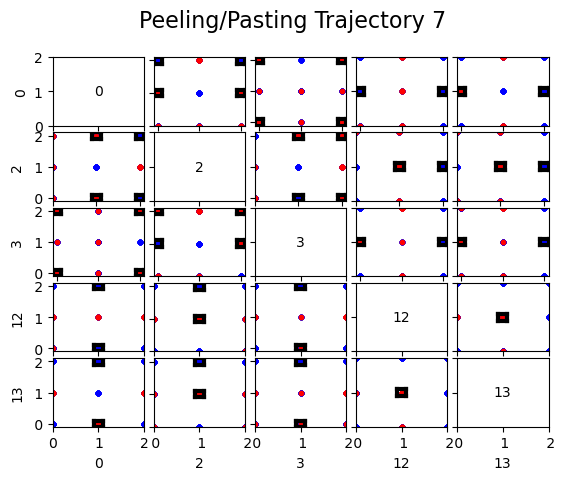

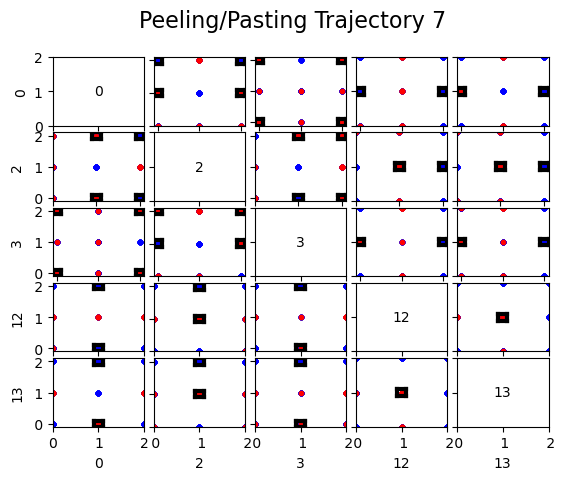

In [77]:
box.show_scatter()

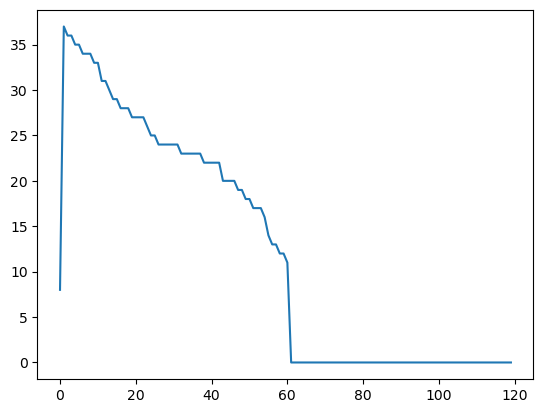

In [78]:
### Plot float(samples_df['result'])
plt.plot(result)
plt.show()


### Process Mitre Attack Group Data Directory (This function is built into headless_sampler.js and can be ignored for now)

In [127]:
### get filename for each file in the directory ../../files/attack_groups
onlyfiles = [f for f in listdir('../../files/attack_groups') if isfile(join('../../files/attack_groups', f))]

for file in onlyfiles:
    subprocess.run(['node', '../../headless_js/headless_sampler.js', '../../files/nets/FullAttackLadderWithVulsAndFuncs.json', '10', 'NA', '../../files/attack_group/'+file, file.split('-')[0]+'_samples.json', file.split('-')[0]+'_summary.json'])

